In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest,chi2

In [74]:
df=pd.read_excel('./../myproj/Survey.xlsx')

In [75]:
df.head()

Timestamp  Which age group you belong to?  \
0 2020-06-19 13:39:55.750                               2   
1 2020-06-19 13:40:56.063                               2   
2 2020-06-19 13:42:22.938                               2   
3 2020-06-19 13:51:35.532                               2   
4 2020-06-19 13:51:44.612                               2   

   Location(From which state you are?)  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    1   

  Is it difficult to get essentials(food/medicine)? What is your gender?  \
0                                                 0                    1   
1                                                 0                    1   
2                                                 0                    1   
3                                                 0                    0   
4                                                 0                    1   

  How you ever felt symptoms of COVID?   \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  Do you have any of the following conditions?  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  During the lockdown have you been doing more household work?  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  0             
4                                                  0             

  Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID?   \
0                                                  1                                          
1                                                  0                                          
2                                                  0                                          
3                                                  1                                          
4                                                  1                                          

  How often do you use masks/hand sanitizers(per day)?  ...  \
0                                                  0    ...   
1                                                  0    ...   
2                                                  0    ...   
3                                                  1    ...   
4                                                  1    ...   

  Over the last 2 weeks, how often have you been bothered by being so restless that it is hard to sit still?  \
0                                                  0                                                           
1                                                  1                                                           
2                                                  0                                                           
3                                                  0                                                           
4                                                  0                                                           

  Over the last 2 weeks, how often have you been bothered by trouble relaxing?  \
0                                                  0                             
1                                                  1                             
2                                                  1                             
3                              

In [76]:
df.columns

Index(['Timestamp', 'Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospita

In [16]:
X=df[['Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests? ',
       'Did you face a pay cut/job loss/take a0ther job to cover expenses?',
       'How often do you leave your house?(per week) ',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by 0t being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?']]

In [86]:
y=y.loc[:800]

In [88]:
y.isnull().sum()

0

In [77]:
df=df.loc[:800,:]

In [78]:
X=df[['Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests? ',
       'Did you face a pay cut/job loss/take a0ther job to cover expenses?',
       'How often do you leave your house?(per week) ',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by 0t being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?']]

In [79]:
X.head()

Which age group you belong to?  Location(From which state you are?)  \
0                               2                                    1   
1                               2                                    1   
2                               2                                    1   
3                               2                                    1   
4                               2                                    1   

  Is it difficult to get essentials(food/medicine)? What is your gender?  \
0                                                 0                    1   
1                                                 0                    1   
2                                                 0                    1   
3                                                 0                    0   
4                                                 0                    1   

  How you ever felt symptoms of COVID?   \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  Do you have any of the following conditions?  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  During the lockdown have you been doing more household work?  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  0             
4                                                  0             

  Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID?   \
0                                                  1                                          
1                                                  0                                          
2                                                  0                                          
3                                                  1                                          
4                                                  1                                          

  How often do you use masks/hand sanitizers(per day)?  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  1     
4                                                  1     

  Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?  \
0                                                  0                                                                                                       
1                                                  0                                                                                                       
2                                                  1                                                                                                       
3                                                  0                                                                                                       
4                                                  0                                                                                                       

   ... Has your sleep cycle changed drastically?  \
0  ...                                         0   
1  ...                                         1   
2  ...                                         1   
3  ...                                         1   
4  ...                     

In [56]:
X.shape

(801, 25)

In [66]:
X.head()

Which age group you belong to?  Location(From which state you are?)  \
0                               2                                    1   
1                               2                                    1   
2                               2                                    1   
3                               2                                    1   
4                               2                                    1   

  Is it difficult to get essentials(food/medicine)? What is your gender?  \
0                                                 0                    1   
1                                                 0                    1   
2                                                 0                    1   
3                                                 0                    0   
4                                                 0                    1   

  How you ever felt symptoms of COVID?   \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  Do you have any of the following conditions?  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  During the lockdown have you been doing more household work?  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  0             
4                                                  0             

  Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID?   \
0                                                  1                                          
1                                                  0                                          
2                                                  0                                          
3                                                  1                                          
4                                                  1                                          

  How often do you use masks/hand sanitizers(per day)?  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  1     
4                                                  1     

  Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?  \
0                                                  0                                                                                                       
1                                                  0                                                                                                       
2                                                  1                                                                                                       
3                                                  0                                                                                                       
4                                                  0                                                                                                       

   ... Has your sleep cycle changed drastically?  \
0  ...                                         0   
1  ...                                         1   
2  ...                                         1   
3  ...                                         1   
4  ...                     

In [87]:
y.head()

0    0.0
1    1.0
2    2.0
3    0.0
4    0.0
Name: Level Of Anxiety , dtype: float64

In [68]:
X

Which age group you belong to?  Location(From which state you are?)  \
0                                 2                                    1   
1                                 2                                    1   
2                                 2                                    1   
3                                 2                                    1   
4                                 2                                    1   
..                              ...                                  ...   
796                               2                                    1   
797                               2                                    1   
798                               2                                    1   
799                               2                                    1   
800                               1                                   22   

    Is it difficult to get essentials(food/medicine)? What is your gender?  \
0                                                   0                    1   
1                                                   0                    1   
2                                                   0                    1   
3                                                   0                    0   
4                                                   0                    1   
..                                                ...                  ...   
796                                                 0                    1   
797                                                 0                    0   
798                                                 0                    1   
799                                                 0                    0   
800                                                 0                    1   

    How you ever felt symptoms of COVID?   \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
..                                    ...   
796                                     0   
797                                     0   
798                                     0   
799                                     0   
800                                     0   

    Do you have any of the following conditions?  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
..                                           ...   
796                                            0   
797                                            0   
798                                            0   
799                                            0   
800                                            0   

    During the lockdown have you been doing more household work?  \
0                                                    1             
1                                                    0             
2                                                    1             
3                                                    0             
4                                                    0             
..                                                 ...             
796                                                  1             
797                                                  0             
798                                                  1             
799                                                  1             
800                                                  0             

    Have you or anyone you k0w have corona virus/recovered from COVID/been tested for COVID?   \
0                                                    1                     

In [84]:
y=df['Level Of Anxiety ']

In [71]:
df['Level Of Anxiety '].unique()

array(['0 anxiety', 'mild anxiety', 'moderate anxiety', 'severe anxiety'],
      dtype=object)

In [96]:
fs = SelectKBest(chi2, k=12)

In [106]:
fs1=fs.fit(X,y)

In [98]:
X_new=fs.transform(X)

In [100]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 4.724411
Feature 1: 46.099518
Feature 2: 6.516808
Feature 3: 4.197936
Feature 4: 2.512151
Feature 5: 6.854517
Feature 6: 1.510971
Feature 7: 9.807921
Feature 8: 1.772112
Feature 9: 67.556081
Feature 10: 5.472099
Feature 11: 5.753331
Feature 12: 10.899328
Feature 13: 1.205245
Feature 14: 15.244430
Feature 15: 37.849831
Feature 16: 47.081113
Feature 17: 1.366389
Feature 18: 4.224654
Feature 19: 1.853973
Feature 20: 0.057950
Feature 21: 2.440964
Feature 22: 4.346436
Feature 23: 10.847415
Feature 24: 13.107221


In [107]:
pyplot.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
pyplot.show()

In [103]:
from matplotlib import pyplot

ValueError: Shape of passed values is (12, 2), indices imply (801, 2)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest,chi2
from matplotlib import pyplot

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)
df.head()

Timestamp  Which age group you belong to?  \
0 2020-06-19 13:39:55.750                               2   
1 2020-06-19 13:40:56.063                               2   
2 2020-06-19 13:42:22.938                               2   
3 2020-06-19 13:51:35.532                               2   
4 2020-06-19 13:51:44.612                               2   

   Location(From which state you are?)  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    1   

   Is it difficult to get essentials(food/medicine)?  What is your gender?  \
0                                                  0                     1   
1                                                  0                     1   
2                                                  0                     1   
3                                                  0                     0   
4                                                  0                     1   

   How you ever felt symptoms of COVID?   \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Do you have any of the following conditions?  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   During the lockdown have you been doing more household work?  \
0                                                  1              
1                                                  0              
2                                                  1              
3                                                  0              
4                                                  0              

   Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?   \
0                                                  1                                            
1                                                  0                                            
2                                                  0                                            
3                                                  1                                            
4                                                  1                                            

   How often do you use masks/hand sanitizers(per day)?  ...  \
0                                                  0     ...   
1                                                  0     ...   
2                                                  0     ...   
3                                                  1     ...   
4                                                  1     ...   

   Over the last 2 weeks, how often have you been bothered by being so restless that it is hard to sit still?  \
0                                                  0                                                            
1                                                  1                                                            
2                                                  0                                                            
3                                                  0                                                            
4                                                  0                                                            

   Over the last 2 weeks, how often have you been bothered by trouble relaxing?  \
0                                                  0                              
1                                                  1                              
2                                                  1    

In [5]:
df.shape

(830, 39)

In [6]:
df.columns

Index(['Timestamp', 'Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospit

In [7]:
X=df[['Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests? ',
       'Did you face a pay cut/job loss/take a0ther job to cover expenses?',
       'How often do you leave your house?(per week) ',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?',]]

In [8]:
y=df['Level Of Anxiety ']

In [9]:
X.shape, y.shape

((830, 25), (830,))

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [11]:
fs = SelectKBest(chi2, k=12)
fs1=fs.fit(X_train,y_train)
X_new=fs.transform(X_train)

In [12]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 4.857612
Feature 1: 67.538871
Feature 2: 7.176828
Feature 3: 2.516445
Feature 4: 3.011850
Feature 5: 6.441948
Feature 6: 0.928220
Feature 7: 7.731036
Feature 8: 1.361746
Feature 9: 64.759336
Feature 10: 5.732492
Feature 11: 8.211678
Feature 12: 11.892353
Feature 13: 1.901394
Feature 14: 13.238941
Feature 15: 36.087562
Feature 16: 34.982351
Feature 17: 1.284980
Feature 18: 3.905063
Feature 19: 4.389596
Feature 20: 0.551759
Feature 21: 3.983967
Feature 22: 5.170286
Feature 23: 10.334806
Feature 24: 11.314197


In [13]:
fs1=pd.Series(fs.scores_)
fs1.index=X_train.columns

In [14]:
fs1.sort_values(ascending=False, inplace=True)

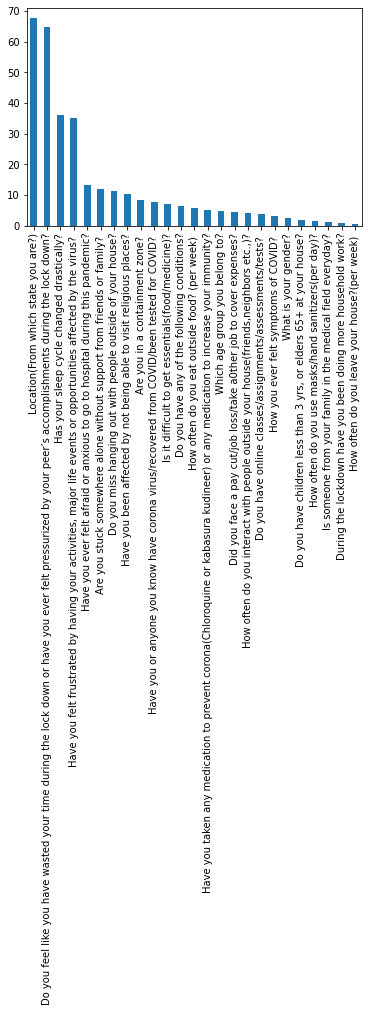

In [15]:
fs1.plot.bar()